In [1]:
from preamble import *
%matplotlib inline

### 2.3 有监督学习算法
#### 2.3.3 线性模型：利用输入特征的线性函数进行预测
##### 1. 线性回归模型
\begin{align*}
\hat{y}=w[0]*x[0]+w[1]*x[1]+\cdots+w[p]*x[p]+b
\end{align*}

- 单一特征的预测结果是一条直线
- 两个特征的预测结果是一个平面
- 多个特征的预测结果是一个超平面

注：如果特征数量大于训练数据点的数量，任何目标 y 都可以(在训练集上)用线性函数完美拟合

w[0]: 0.393906  b: -0.031804


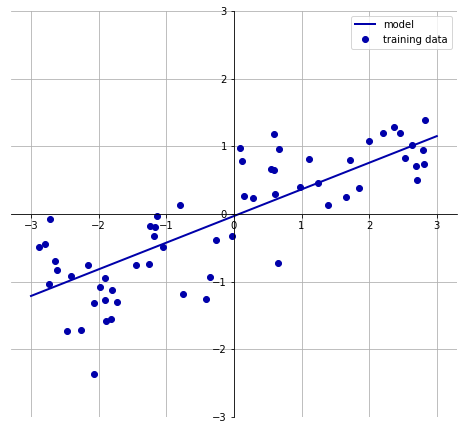

In [2]:
# 在一维 wave 数据集上学习参数 w[0] 和 b
mglearn.plots.plot_linear_regression_wave()

#### 2. 线性回归模型(又名：普通最小二乘法)

最简单也是最经典的线性方法。

目标：预测值和真实值之间的差的平方各，即均方误差最小。

-   均方误差(Mean Squared Error，MSE)：预测值与真实值之间的平方和除以样本数。

线性回归没有需要设置的参数，即模型没有超参数，也就无法控制模型的复杂度。

In [3]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [4]:
print("lr.coef_:", lr.coef_)                    # 斜率，也叫权重，或叫系数
print("lr.intercept_:", lr.intercept_)      # 偏移，也叫截距

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [5]:
# 训练集与测试集的得分非常接近，并且模型精度较低，说明训练存在欠拟合。
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [6]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
# 低维的数据集，线性回归模型容易发生欠拟合；高维的数据集，线性回归模型容易发生过拟合
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


##### 3. 岭回归

-   正则化：对模型做显式的约束，避免过拟合
    -   L1 正则化：就是Lasso 正则化
    -   L2 正则化：就是岭(Ridge)回归

In [8]:
# Ridge 是一种约束更强的模型，更加不容易过拟合
# 稍稍增加的复杂度会降低模型在训练集上的性能，但是会提高在测试集上的泛化性能
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [9]:
# Ridge 模型在模型的复杂度与训练集性能之间做出权衡
# alpha 参数控制着模型的复杂度与训练集性能之间的平衡
# alpha 的增加会使系数趋向于0，从而降低训练集的性能，提高测试集的泛化能力
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [10]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


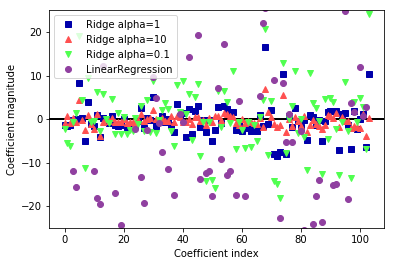

In [11]:
# 比较不同 alpha 值的岭回归模型与线性回归模型的系数
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

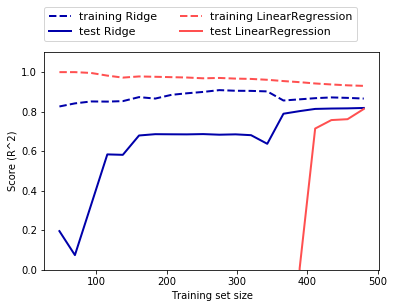

In [12]:
# 岭回归和线性回归在Boston数据集上的学习曲线
mglearn.plots.plot_ridge_n_samples()

##### 4. Lasso 正则化

给出了更容易解释的模型，只选择了部分输入特征，也可看作自动化的特征选择，呈现了模型最重要的特征，模型更具有解释性

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [14]:
# 为了降低欠拟合，需要调小 alpha 值时，同时需要增大 "max_iter",
# 否则模型会发出警告
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [15]:
# 如果 alpha 的值过小，模型的正则化效果就会很差，容易出现过拟合
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0,0.5,'Coefficient magnitude')

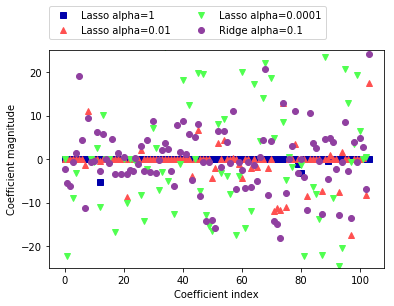

In [16]:
# 比较不同 alpha 值的 Lasso 回归与 Ridge 回归的系数
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Lasso 回归与 Ridge 回归

-   Ridge 回归是首选
-   特征过多时，Lasso 回归时效果更好
-   Scikit-Learn 提供了 ElasticNet 类，结合了 Lasso 和 Ridge 的惩罚项
    -   优点：效果最好； ( 亲测了不觉得好在哪里 )
    -   缺点：需要调节两个参数。一个用于 L1 正则化，一个用于 L2 正则化

##### 5. 线性分类模型
\begin{align*}
\hat{y}=w[0]*x[0]+w[1]*x[1]+\cdots+w[p]*x[p]+b>0
\end{align*}

-   线性分类模型：
    -   算法的区别：
        -   系数和截距的特定组合对训练数据拟合好坏的度量方法
        -   正则化方法
    -   算法的分类：
        -   Logistic 回归 ( Logistic Regression, LR )
        -   线性支持向量机 ( Linear Support Vector Machine, LSVM )

\begin{align*}
\end{align*}

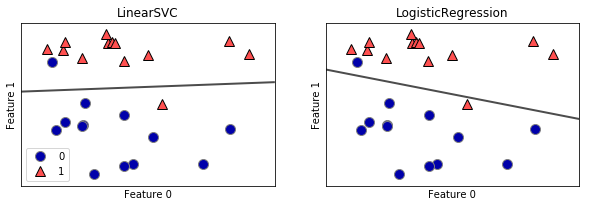

In [17]:
# 比较线性SVM分类器与Logistic回归分类器在 forge 数据集上的决策边界
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

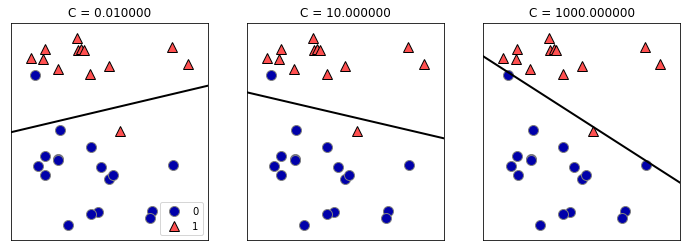

In [18]:
# 比较不同 C 值的线性 SVM 分类器在 forge 数据集上的决策边界
mglearn.plots.plot_linear_svc_regularization()

In [19]:
# 在 breast cancer 数据集上使用 LogisticRegression()
# 注：默认值 C=1时，泛化性能最好
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


In [20]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.951


In [21]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


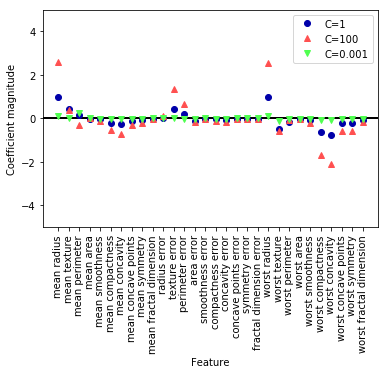

In [22]:
# 比较不同 C 值的，L2 正则的Logistic回归在breast cancer 数据集上学到的系数
# 注：L2 正则是默认的正则选择 
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


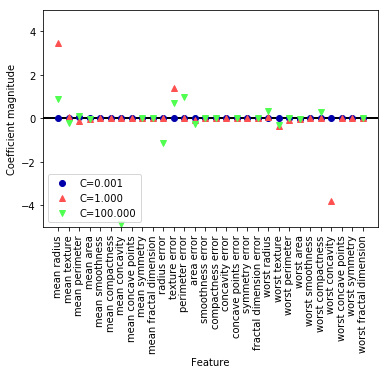

In [23]:
# 比较不同 C 值的，L1 正则的Logistic回归在breast cancer 数据集上学到的系数
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### 6. 线性多分类模型
\begin{align*}
\end{align*}
-   线性多分类模型：
    -   多分类算法：「一对其余」 ( One-vs-Rest ) 。
    每个类别都学习一个二分类模型，将这个类别与所有其他类别尽可能分开，这样就产生了与类别个数一样多的二分类模型，
    在测试点上运行所有的二分类模型进行预测，在对应类别上分数最高的分类器「胜出」作为预测结果。

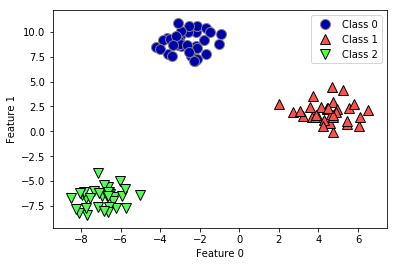

In [24]:
# blob 是从高斯分布中采样得到的三个类别的二维数据
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [25]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


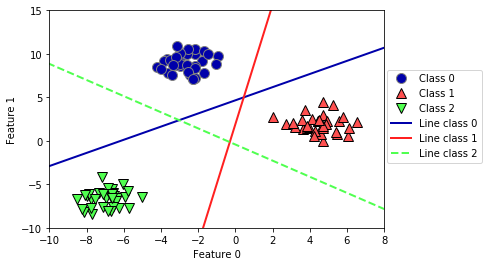

In [26]:
# 三个「一对其他」分类器学到的决策边界
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0,0.5,'Feature 1')

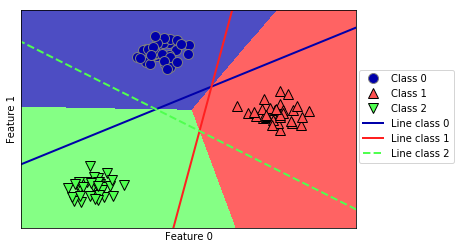

In [27]:
# 三个「一对其他」分类器得到的多分类决策边界
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 7.优点、缺点与参数
-   优点：
    -   线性模型训练速度快，预测速度快，可以推广到非常大的数据集，也能应用于稀疏数据
    -   线性模型更容易理解和解释
    -   线性模型在高维空间中表现通常都很好
-   参数：
    -   回归模型中为 alpha
        -   alpha 值较大时，模型简单
    -   线性 SVM 分类模型和 Logistic 回归模型中为 C
        -   C 值较小时，模型简单
        -   还可以控制正则化方式 penalty，默认为 L2，还可以设置 L1

In [28]:
# 方法链：函数调用的拼接
# 优点：简化代码的书写
# 缺点：不容易阅读和调试
logreg = LogisticRegression().fit(X_train, y_train)

In [29]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [30]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)